In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv('train.csv')
df

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


### 날짜와 섭씨로 바꾸겠습니다.

In [9]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
def F2C(Fahrenheit):
    Celsius = (Fahrenheit - 32) * 5 / 9
    return Celsius

df.Temperature = df.Temperature.apply(F2C)
df

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,2010-02-12,3.616667,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,2010-02-19,4.405556,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,2010-02-26,8.127778,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,2010-03-05,8.055556,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,23.938889,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,2012-09-07,24.277778,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,2012-09-14,19.927778,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,2012-09-21,18.511111,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


### Promotion 1,2,3,4,5 에 결측치가 많이 보입니다.

In [10]:
df.isnull().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

### Promotion 칼럼을 살펴본 결과, 2011-11-04 이전에는 promotion이 기록되지 않았습니다.

In [11]:
df[df.Promotion1.isnull() & df.Promotion2.isnull() & df.Promotion3.isnull() & df.Promotion4.isnull() & df.Promotion5.isnull()]

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,2010-02-12,3.616667,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,2010-02-19,4.405556,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,2010-02-26,8.127778,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,2010-03-05,8.055556,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,6204,45,2011-10-07,13.233333,3.583,NaN,NaN,NaN,NaN,NaN,8.523,False,753447.05
6204,6205,45,2011-10-14,17.677778,3.541,NaN,NaN,NaN,NaN,NaN,8.523,False,720946.99
6205,6206,45,2011-10-21,15.333333,3.570,NaN,NaN,NaN,NaN,NaN,8.523,False,771686.40
6206,6207,45,2011-10-28,10.988889,3.569,NaN,NaN,NaN,NaN,NaN,8.523,False,781694.57


### 이 값들은 0으로 채우고, 2011년 11월 4일 이후의 NaN 값들은 선형보간법을 사용하겠습니다.

In [15]:
df['Promotion1'] = np.where(df['Date']<='2011-11-04', 0, df['Promotion1'])
df['Promotion2'] = np.where(df['Date']<='2011-11-04', 0, df['Promotion2'])
df['Promotion3'] = np.where(df['Date']<='2011-11-04', 0, df['Promotion3'])
df['Promotion4'] = np.where(df['Date']<='2011-11-04', 0, df['Promotion4'])
df['Promotion5'] = np.where(df['Date']<='2011-11-04', 0, df['Promotion5'])

df = df.interpolate(method='values')

df

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,5.727778,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,2010-02-12,3.616667,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,2010-02-19,4.405556,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,2010-02-26,8.127778,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,2010-03-05,8.055556,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,23.938889,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,2012-09-07,24.277778,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,2012-09-14,19.927778,3.948,11407.95,52.54,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,2012-09-21,18.511111,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [16]:
# 결측치 없음
df.isnull().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64

### 더욱 자세히 본 결과, Promotion2,3에 음수의 값이 있습니다. 저는 이것이 부호가 틀린 유의미한 값이라고 판단하고, 부호를 바꾸기로 했습니다.

In [17]:
df[df['Promotion2'] < 0]

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
528,529,4,2012-03-23,15.038889,3.759,8806.80,-10.500000,5.990,739.14,4396.97,4.607,False,2091592.54
688,689,5,2012-08-17,30.844444,3.571,1649.56,-10.980000,2.310,1955.75,1205.23,5.603,False,314014.18
1243,1244,9,2012-08-10,31.477778,3.494,3180.78,-9.940000,1.400,2112.03,2314.58,5.277,False,538713.47
1244,1245,9,2012-08-17,30.205556,3.571,975.91,-8.945000,3.000,325.68,670.48,5.277,False,535153.47
1245,1246,9,2012-08-24,25.500000,3.620,1524.71,-7.950000,1.800,501.16,4241.59,5.277,False,572887.78
1246,1247,9,2012-08-31,27.061111,3.638,5758.14,-6.955000,17.600,2828.89,1884.13,5.277,False,576879.15
1247,1248,9,2012-09-07,31.072222,3.730,4837.99,-5.960000,22.740,602.80,1377.59,5.277,True,565812.29
1248,1249,9,2012-09-14,23.083333,3.717,2640.68,-2.025000,10.750,385.53,4276.03,5.277,False,523427.35
1361,1362,10,2012-03-16,16.727778,4.273,3977.45,-10.500000,6.030,1928.50,2273.92,7.545,False,1930814.66
1379,1380,10,2012-07-20,29.138889,3.589,6596.80,-1.600000,44.600,4275.27,10650.28,7.170,False,1869967.03


In [18]:
df['Promotion2'] = df['Promotion2'].abs()
df['Promotion3'] = df['Promotion3'].abs()

### 제일 먼저 각 store의 평균 매출을 확인했습니다. store별 매출 차이가 크니, store별로 매출을 예상하는게 좋아보입니다.

[Text(0.5, 1.0, 'Weekly Sales of Store')]

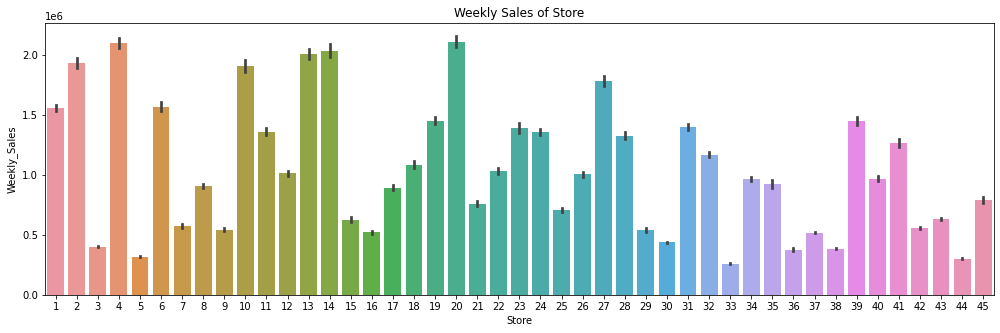

In [19]:
fig, axes = plt.subplots(figsize=(17,5))
sns.barplot(x='Store', y="Weekly_Sales",data=df).set(title='Weekly Sales of Store')

### 다음은 공휴일이 포함된 주별로 평균 매출, 각 promotion을 확인했습니다. Promotion2,3 경우에는 주로 공휴일이 포함된 주에만 진행하는거 같아 보입니다. Promotion은 원활한 분석을 위해 2011/11/04 이후의 데이터만 보겠습니다.

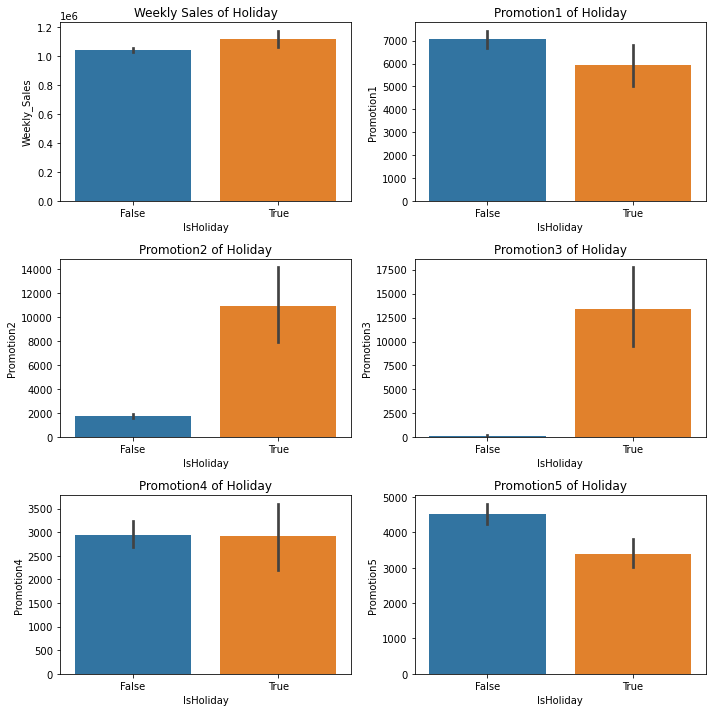

In [20]:
df_promotion = df[df['Date'] >= '2011-11-04']

fig, axes = plt.subplots(3, 2, figsize=(10,10))

sns.barplot(x='IsHoliday', y="Weekly_Sales",data=df, ax=axes[0][0]).set(title='Weekly Sales of Holiday')
sns.barplot(x='IsHoliday', y="Promotion1",data=df_promotion, ax=axes[0][1]).set(title='Promotion1 of Holiday')
sns.barplot(x='IsHoliday', y="Promotion2",data=df_promotion, ax=axes[1][0]).set(title='Promotion2 of Holiday')
sns.barplot(x='IsHoliday', y="Promotion3",data=df_promotion, ax=axes[1][1]).set(title='Promotion3 of Holiday')
sns.barplot(x='IsHoliday', y="Promotion4",data=df_promotion, ax=axes[2][0]).set(title='Promotion4 of Holiday')
sns.barplot(x='IsHoliday', y="Promotion5",data=df_promotion, ax=axes[2][1]).set(title='Promotion5 of Holiday')

plt.tight_layout()
plt.show()

### 다음은 각 특징들을 한번에 확인해봤습니다. 거의 비슷한 모양을 띄지만, 편차가 있습니다.  또한 Fuel Price는 증가하지만 Unemployment는 하락을 보입니다.

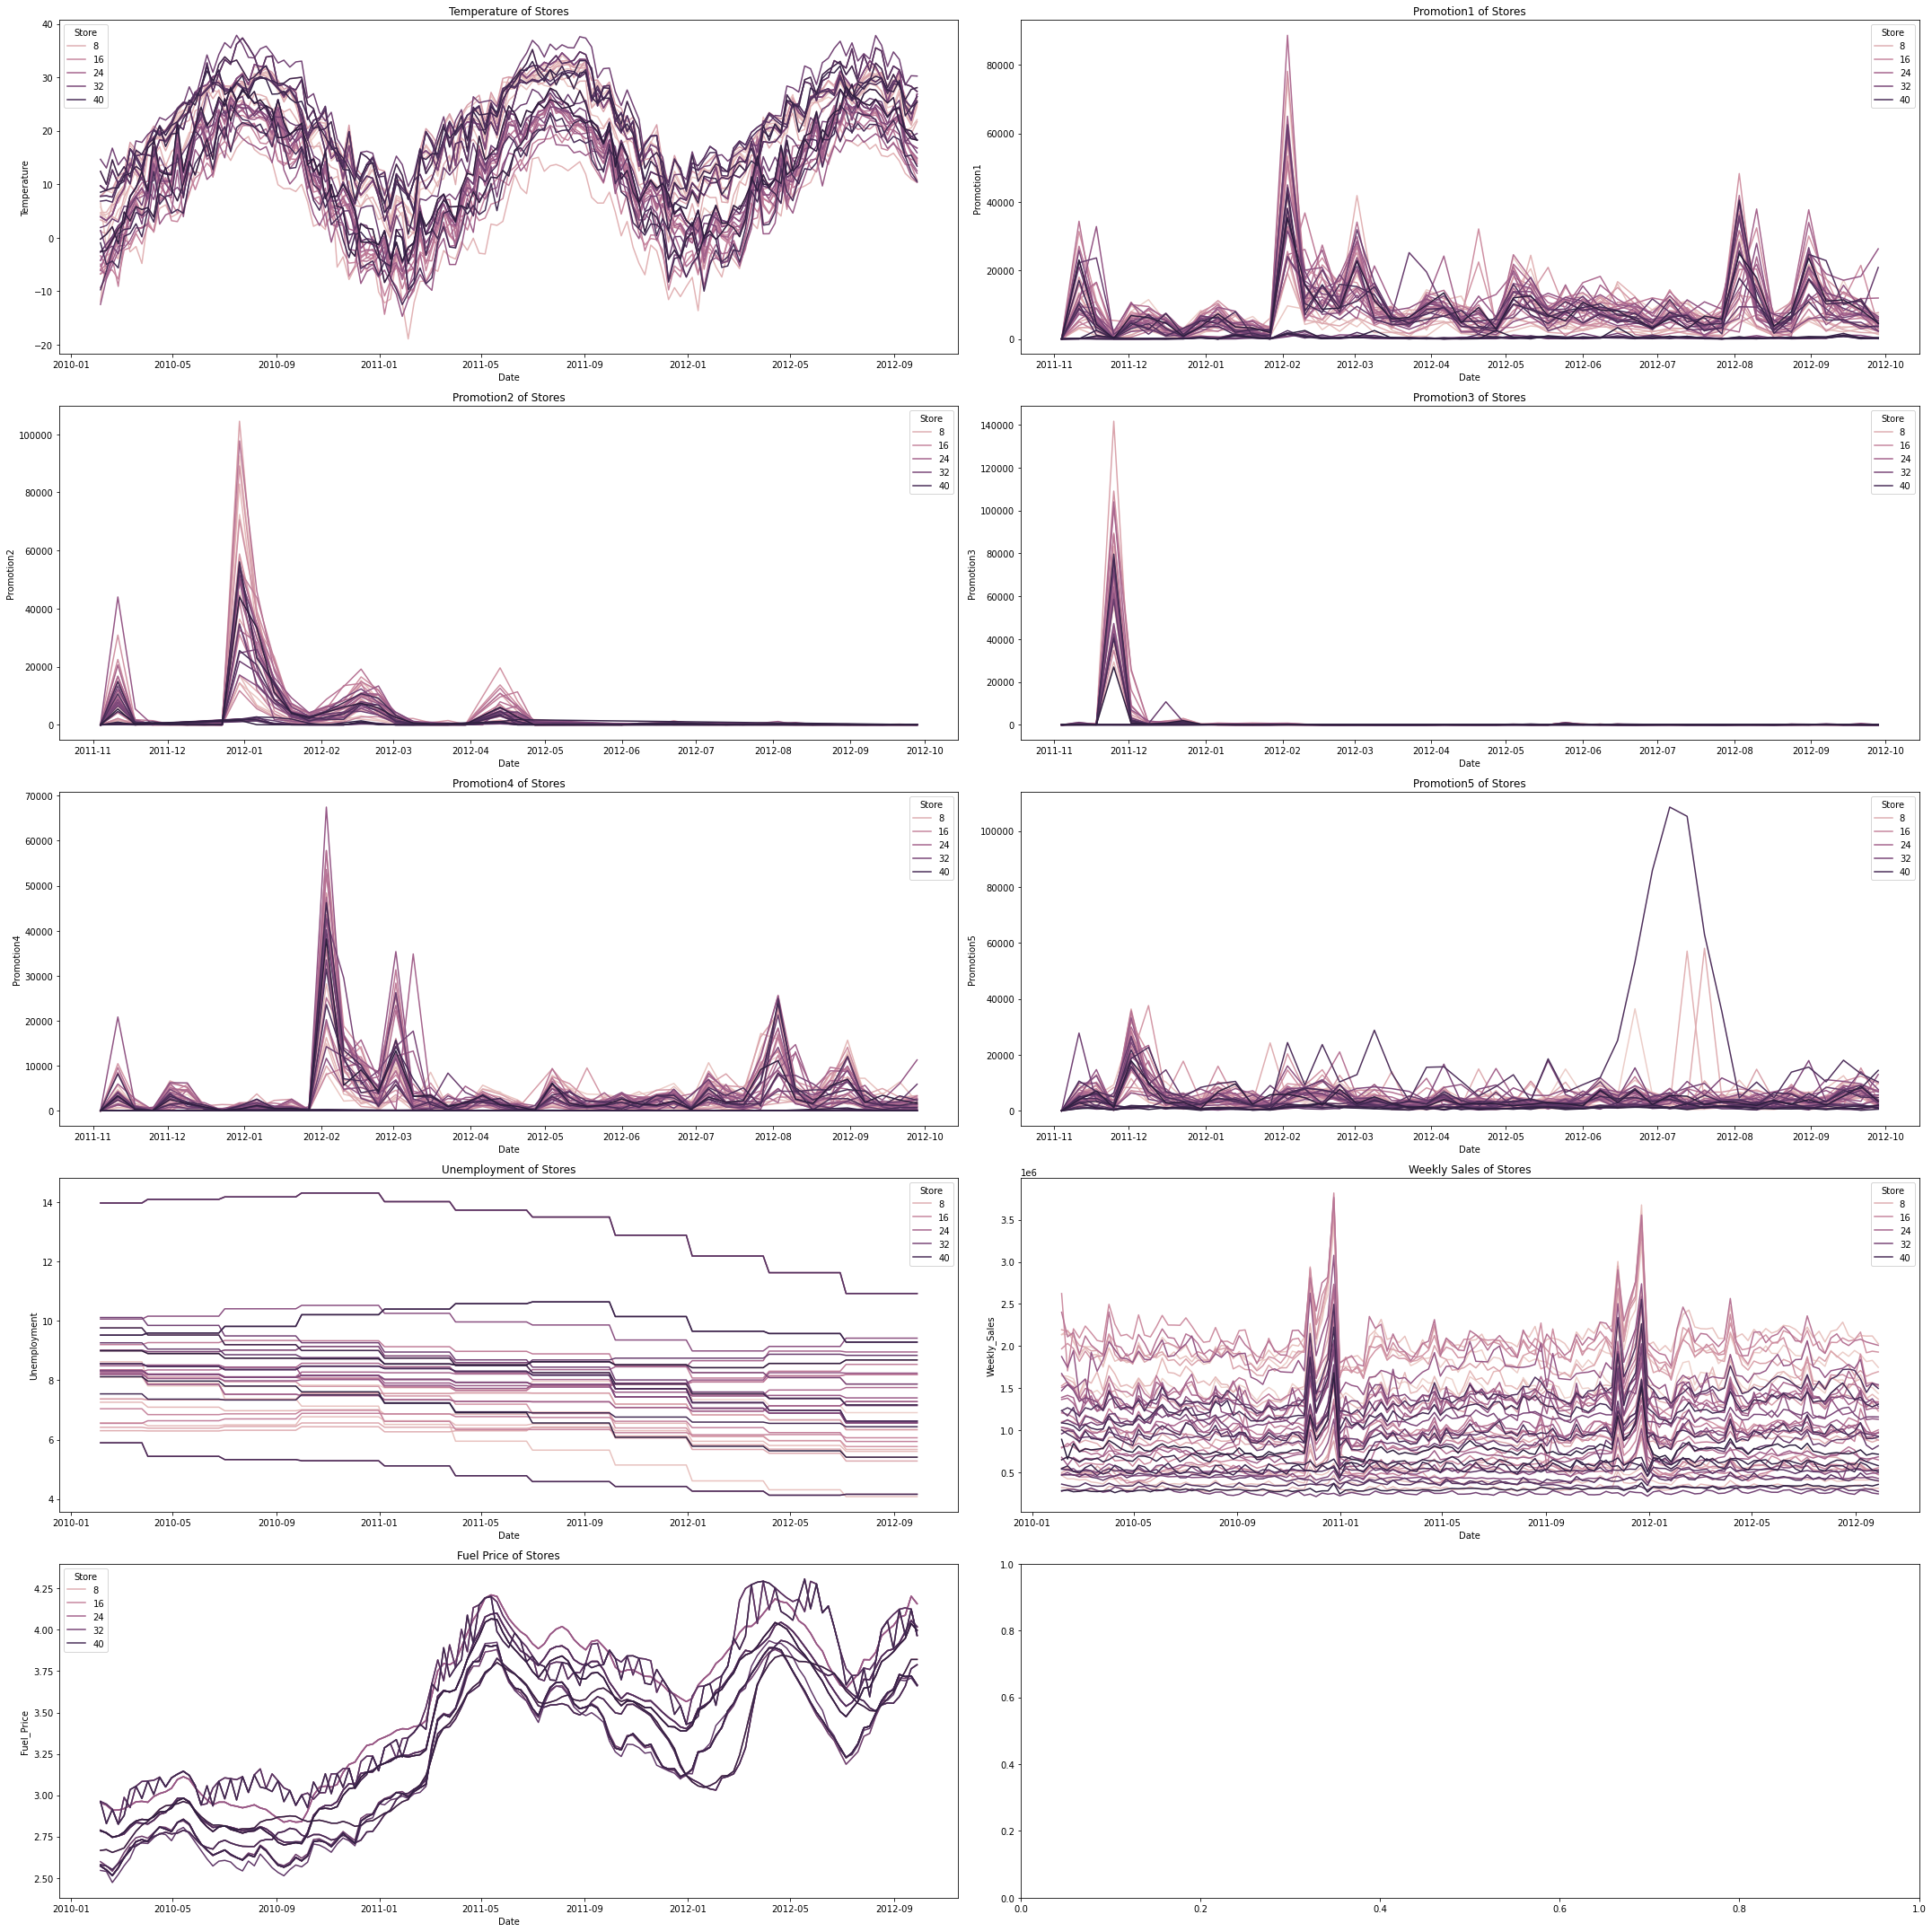

In [21]:
fig, axes = plt.subplots(5, 2, figsize=(30,30))

sns.lineplot(x='Date',y='Temperature',hue='Store',data=df,ax=axes[0][0]).set(title='Temperature of Stores')
sns.lineplot(x='Date', y='Promotion1', hue='Store', data=df_promotion,ax=axes[0][1]).set(title='Promotion1 of Stores')
sns.lineplot(x='Date', y='Promotion2', hue='Store', data=df_promotion,ax=axes[1][0]).set(title='Promotion2 of Stores')
sns.lineplot(x='Date', y='Promotion3', hue='Store', data=df_promotion,ax=axes[1][1]).set(title='Promotion3 of Stores')
sns.lineplot(x='Date', y='Promotion4', hue='Store', data=df_promotion,ax=axes[2][0]).set(title='Promotion4 of Stores')
sns.lineplot(x='Date', y='Promotion5', hue='Store', data=df_promotion,ax=axes[2][1]).set(title='Promotion5 of Stores')
sns.lineplot(x='Date', y='Unemployment', hue='Store', data=df,ax=axes[3][0]).set(title='Unemployment of Stores')
sns.lineplot(x='Date', y='Weekly_Sales', hue='Store', data=df,ax=axes[3][1]).set(title='Weekly Sales of Stores')
sns.lineplot(x='Date', y='Fuel_Price', hue='Store', data=df, ax=axes[4][0]).set(title='Fuel Price of Stores')
plt.tight_layout()

plt.show()

### 다음은 각각의 회귀선을 그려 봤습니다. Promotion의 경우 0쪽에 값이 너무 치우처 져있고, 그 외에 요소들은 상관관계가 낮아보입니다.

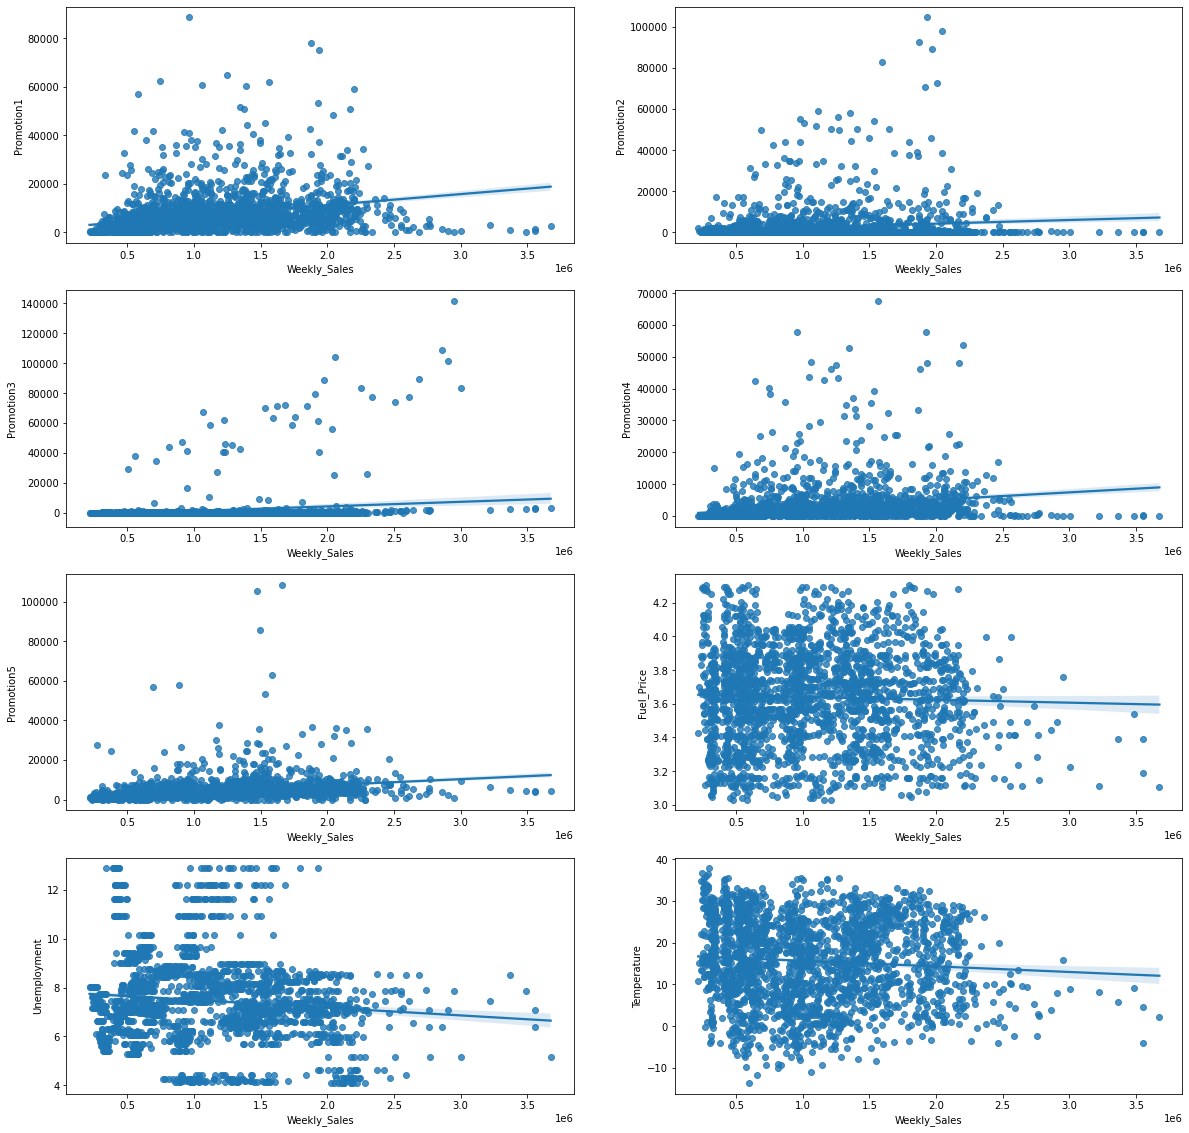

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(20,20))

sns.regplot(x='Weekly_Sales',y='Promotion1',data=df_promotion,ax=axes[0][0])
sns.regplot(x='Weekly_Sales',y='Promotion2',data=df_promotion,ax=axes[0][1])
sns.regplot(x='Weekly_Sales',y='Promotion3',data=df_promotion,ax=axes[1][0])
sns.regplot(x='Weekly_Sales',y='Promotion4',data=df_promotion,ax=axes[1][1])
sns.regplot(x='Weekly_Sales',y='Promotion5',data=df_promotion,ax=axes[2][0])
sns.regplot(x='Weekly_Sales',y='Fuel_Price',data=df_promotion,ax=axes[2][1])
sns.regplot(x='Weekly_Sales',y='Unemployment',data=df_promotion,ax=axes[3][0])
sns.regplot(x='Weekly_Sales',y='Temperature',data=df_promotion,ax=axes[3][1])

plt.show()

### 히트맵을 그려봤을떄, 역시나 promotion이외에 요소들은 상관관계가 낮아보입니다.

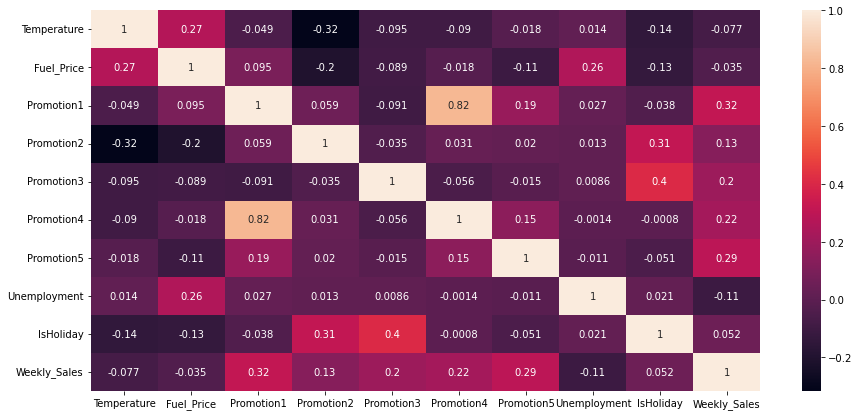

In [23]:
df_promotion = df_promotion.drop(columns=['id','Store'])
plt.figure(figsize=(15,7))
sns.heatmap(df_promotion.corr(),annot=True)
plt.show()

### 각각의 히스토그램을 그려봤습니다. Promotion이 너무 right-skew를 보여서 로그화를 했습니다.

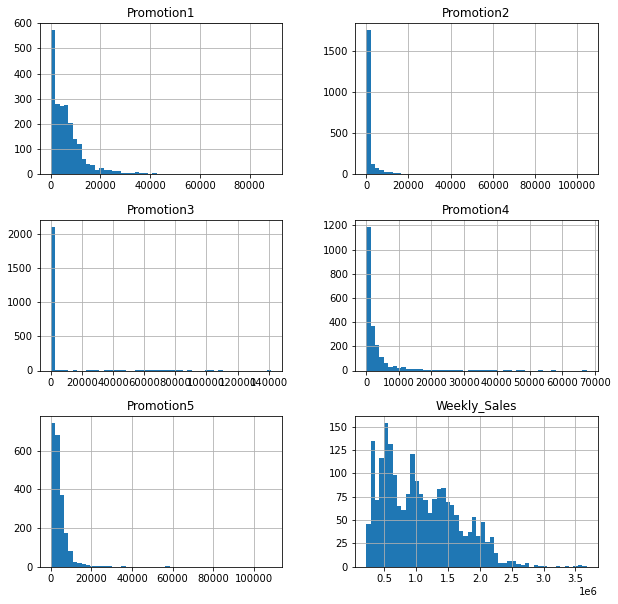

In [24]:
df_promotion = df_promotion.drop(columns = ['Date','IsHoliday','Temperature','Unemployment','Fuel_Price'])
df_promotion.hist(bins=50, figsize=(10,10))
plt.show()

In [25]:
# 필요한 column만 로그화
df_log = np.log1p(df_promotion)
df_log

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Weekly_Sales
91,0.000000,0.000000,0.000000,0.000000,0.000000,14.344508
92,9.248012,8.718773,5.375602,7.786394,8.787590,14.282347
93,8.711957,5.542792,3.969914,6.060034,8.697775,14.246958
94,6.019347,4.595120,10.929646,2.197225,6.320624,14.525181
95,8.635955,4.234107,7.243592,7.642831,9.927024,14.275517
...,...,...,...,...,...,...
6250,10.070793,1.945910,4.542550,8.852137,8.292331,13.506671
6251,9.307962,2.624669,3.982109,7.526055,7.628858,13.549608
6252,9.342153,3.980429,1.667707,8.138191,8.569770,13.462029
6253,9.042300,4.535606,4.162626,7.773754,9.067786,13.491285


### 로그화 진행 후 다시 그려보았을때, Promotion2는 1/3/4/5에 비해 상관관계가 낮은것 같습니다.

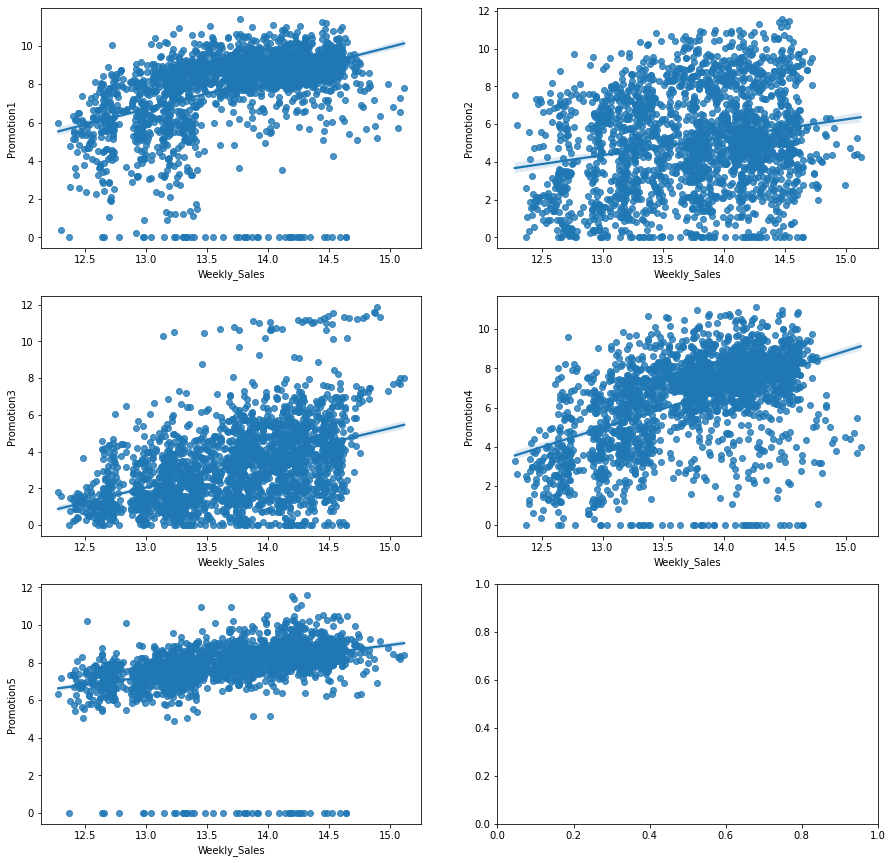

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))

sns.regplot(x='Weekly_Sales',y='Promotion1',data=df_log,ax=axes[0][0])
sns.regplot(x='Weekly_Sales',y='Promotion2',data=df_log,ax=axes[0][1])
sns.regplot(x='Weekly_Sales',y='Promotion3',data=df_log,ax=axes[1][0])
sns.regplot(x='Weekly_Sales',y='Promotion4',data=df_log,ax=axes[1][1])
sns.regplot(x='Weekly_Sales',y='Promotion5',data=df_log,ax=axes[2][0])


plt.show()

### 마지막으로 히트맵을 다시 표현 했습니다. 역시 promotion2는 비교적 다른 promotion보다 상관관계가 낮습니다.

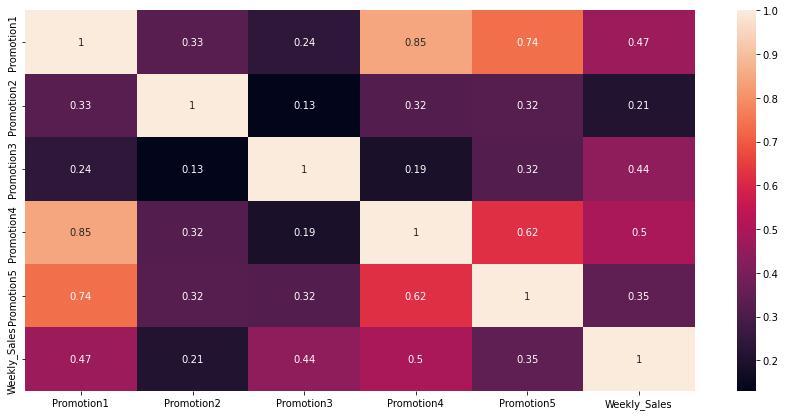

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(df_log.corr(),annot=True)
plt.show()

### 지금까지 봐주셔서 정말 정말 감사합니다!